In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data_path = "ship.csv"
data = pd.read_csv(data_path)

In [53]:
print("Initial dataset shape:", data.shape)
data.head()


Initial dataset shape: (20000, 11)


,Shipment ID,Origin,Destination,Shipment Date,Planned Delivery Date,Actual Delivery Date,Vehicle Type,Distance (km),Weather Conditions,Traffic Conditions,Delayed
0,SHIP000000,Jaipur,Mumbai,2023-04-26,2023-05-01,2023-05-02,Trailer,1603,Rain,Light,Yes
1,SHIP000001,Bangalore,Delhi,2023-02-09,2023-02-13,2023-02-17,Trailer,1237,Storm,Moderate,Yes
2,SHIP000002,Mumbai,Chennai,2023-09-19,2023-09-25,2023-09-25,Truck,1863,Clear,Light,No
3,SHIP000003,Hyderabad,Ahmedabad,2023-04-01,2023-04-05,2023-04-05,Container,1374,Clear,Light,No
4,SHIP000004,Chennai,Kolkata,2023-11-24,2023-11-26,2023-11-28,Container,676,Clear,Heavy,Yes


In [54]:
# Checking for missing values
print("\nMissing values in each column:\n", data.isnull().sum())


Missing values in each column:
 Shipment ID                0
Origin                     0
Destination                0
Shipment Date              0
Planned Delivery Date      0
Actual Delivery Date       0
Vehicle Type             597
Distance (km)              0
Weather Conditions         0
Traffic Conditions         0
Delayed                    0
dtype: int64


In [55]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Shipment ID            20000 non-null  object
 1   Origin                 20000 non-null  object
 2   Destination            20000 non-null  object
 3   Shipment Date          20000 non-null  object
 4   Planned Delivery Date  20000 non-null  object
 5   Actual Delivery Date   20000 non-null  object
 6   Vehicle Type           19403 non-null  object
 7   Distance (km)          20000 non-null  int64 
 8   Weather Conditions     20000 non-null  object
 9   Traffic Conditions     20000 non-null  object
 10  Delayed                20000 non-null  object
dtypes: int64(1), object(10)
memory usage: 1.7+ MB


In [56]:
# Fill missing values in Vehicle Type with mode
vehicle_type_mode = data['Vehicle Type'].mode()[0]
data['Vehicle Type'].fillna(vehicle_type_mode, inplace=True)

# Verify if missing values are handled
print("\nMissing values after handling:")
print(data.isnull().sum())



Missing values after handling:
Shipment ID              0
Origin                   0
Destination              0
Shipment Date            0
Planned Delivery Date    0
Actual Delivery Date     0
Vehicle Type             0
Distance (km)            0
Weather Conditions       0
Traffic Conditions       0
Delayed                  0
dtype: int64


<ipython-input-56-46ac31e59ca2>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Vehicle Type'].fillna(vehicle_type_mode, inplace=True)


In [57]:
# Convert date columns to datetime format
date_columns = ['Shipment Date', 'Planned Delivery Date', 'Actual Delivery Date']
for col in date_columns:
    data[col] = pd.to_datetime(data[col])

# Verify conversion
print("\nData types after date conversion:")
print(data.dtypes)



Data types after date conversion:
Shipment ID                      object
Origin                           object
Destination                      object
Shipment Date            datetime64[ns]
Planned Delivery Date    datetime64[ns]
Actual Delivery Date     datetime64[ns]
Vehicle Type                     object
Distance (km)                     int64
Weather Conditions               object
Traffic Conditions               object
Delayed                          object
dtype: object


In [58]:
# Calculate Delivery Duration (in days)
data['Delivery Duration'] = (data['Actual Delivery Date'] - data['Shipment Date']).dt.days

# Calculate Planned vs. Actual Delay (in days)
data['Planned vs Actual Delay'] = (data['Actual Delivery Date'] - data['Planned Delivery Date']).dt.days

# Preview the dataset with new features
print("\nDataset with new features:")
print(data.head())



Dataset with new features:
  Shipment ID     Origin Destination Shipment Date Planned Delivery Date  \
0  SHIP000000     Jaipur      Mumbai    2023-04-26            2023-05-01   
1  SHIP000001  Bangalore       Delhi    2023-02-09            2023-02-13   
2  SHIP000002     Mumbai     Chennai    2023-09-19            2023-09-25   
3  SHIP000003  Hyderabad   Ahmedabad    2023-04-01            2023-04-05   
4  SHIP000004    Chennai     Kolkata    2023-11-24            2023-11-26   

  Actual Delivery Date Vehicle Type  Distance (km) Weather Conditions  \
0           2023-05-02      Trailer           1603               Rain   
1           2023-02-17      Trailer           1237              Storm   
2           2023-09-25        Truck           1863              Clear   
3           2023-04-05    Container           1374              Clear   
4           2023-11-28    Container            676              Clear   

  Traffic Conditions Delayed  Delivery Duration  Planned vs Actual Delay  
0

In [59]:
data.head()

,Shipment ID,Origin,Destination,Shipment Date,Planned Delivery Date,Actual Delivery Date,Vehicle Type,Distance (km),Weather Conditions,Traffic Conditions,Delayed,Delivery Duration,Planned vs Actual Delay
0,SHIP000000,Jaipur,Mumbai,2023-04-26,2023-05-01,2023-05-02,Trailer,1603,Rain,Light,Yes,6,1
1,SHIP000001,Bangalore,Delhi,2023-02-09,2023-02-13,2023-02-17,Trailer,1237,Storm,Moderate,Yes,8,4
2,SHIP000002,Mumbai,Chennai,2023-09-19,2023-09-25,2023-09-25,Truck,1863,Clear,Light,No,6,0
3,SHIP000003,Hyderabad,Ahmedabad,2023-04-01,2023-04-05,2023-04-05,Container,1374,Clear,Light,No,4,0
4,SHIP000004,Chennai,Kolkata,2023-11-24,2023-11-26,2023-11-28,Container,676,Clear,Heavy,Yes,4,2


<ipython-input-60-c1cf15f76a5a>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Delayed', data=data, palette='Set2')


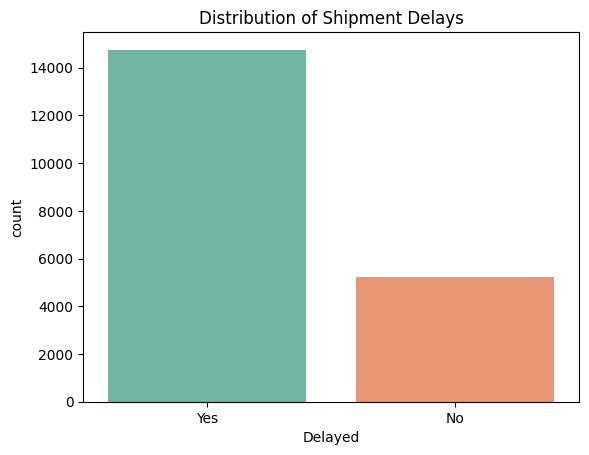

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt

# Distribution of the target variable
sns.countplot(x='Delayed', data=data, palette='Set2')
plt.title("Distribution of Shipment Delays")
plt.show()


<ipython-input-61-909d6c325b32>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=data, order=data[col].value_counts().index, palette='Set3')


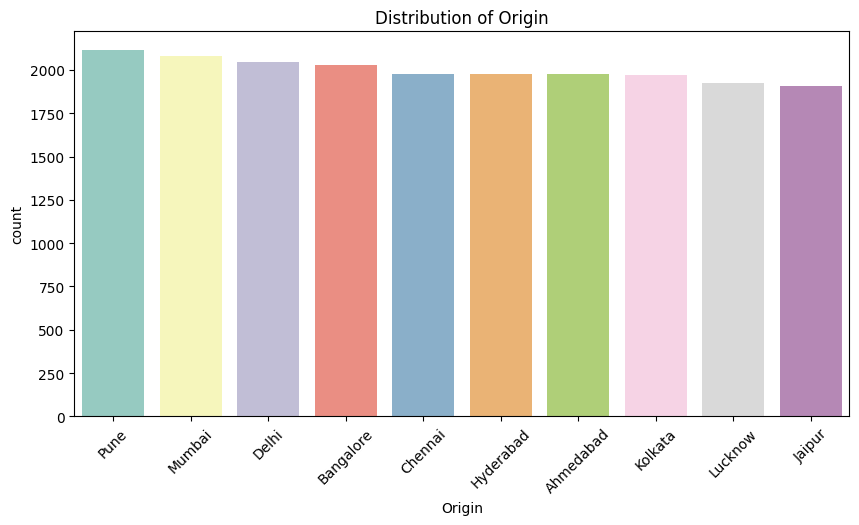

<ipython-input-61-909d6c325b32>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=data, order=data[col].value_counts().index, palette='Set3')


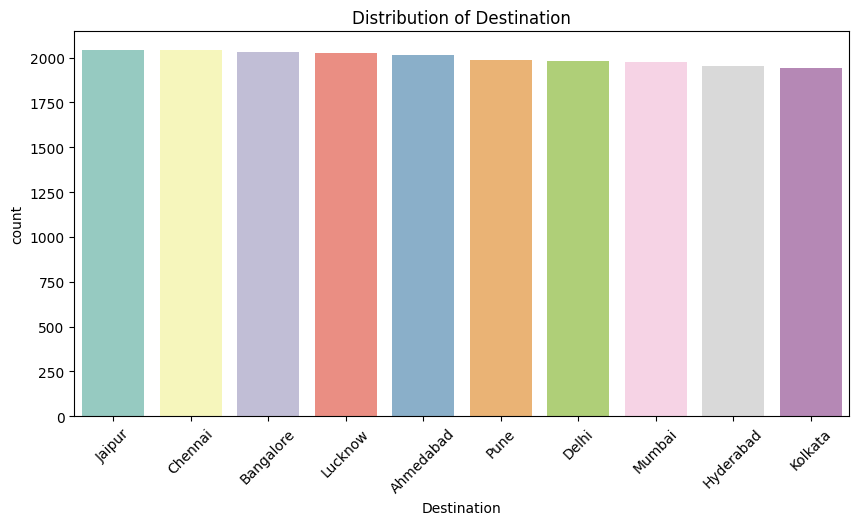

<ipython-input-61-909d6c325b32>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=data, order=data[col].value_counts().index, palette='Set3')


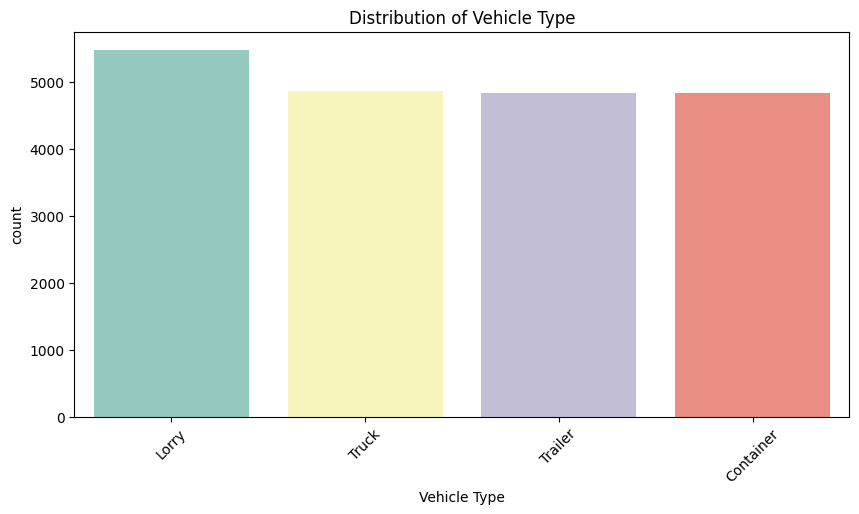

<ipython-input-61-909d6c325b32>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=data, order=data[col].value_counts().index, palette='Set3')


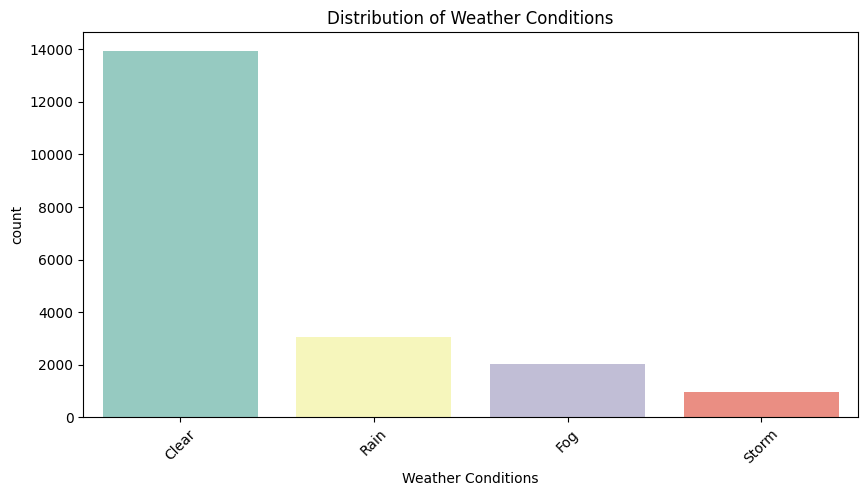

<ipython-input-61-909d6c325b32>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=data, order=data[col].value_counts().index, palette='Set3')


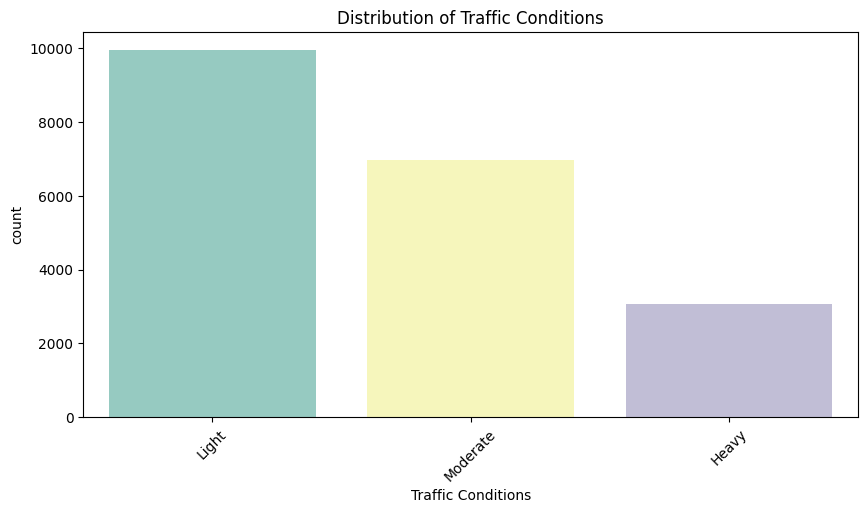

In [61]:
categorical_columns = ['Origin', 'Destination', 'Vehicle Type', 'Weather Conditions', 'Traffic Conditions']
for col in categorical_columns:
    plt.figure(figsize=(10, 5))
    sns.countplot(x=col, data=data, order=data[col].value_counts().index, palette='Set3')
    plt.title(f"Distribution of {col}")
    plt.xticks(rotation=45)
    plt.show()


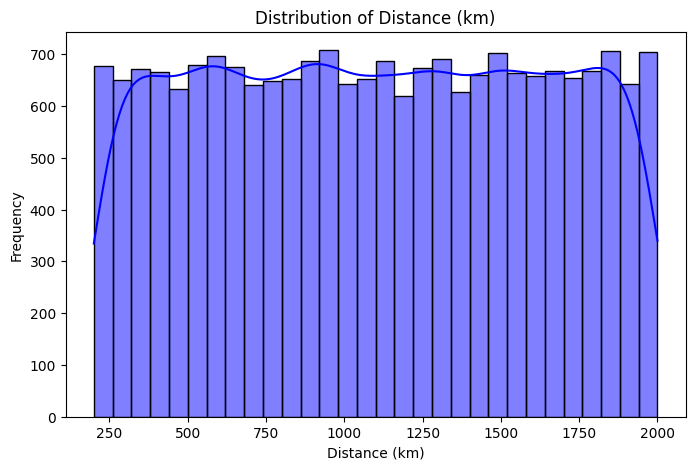

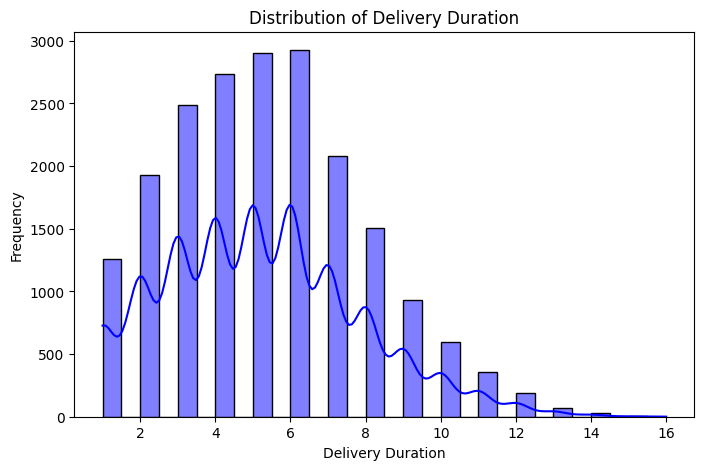

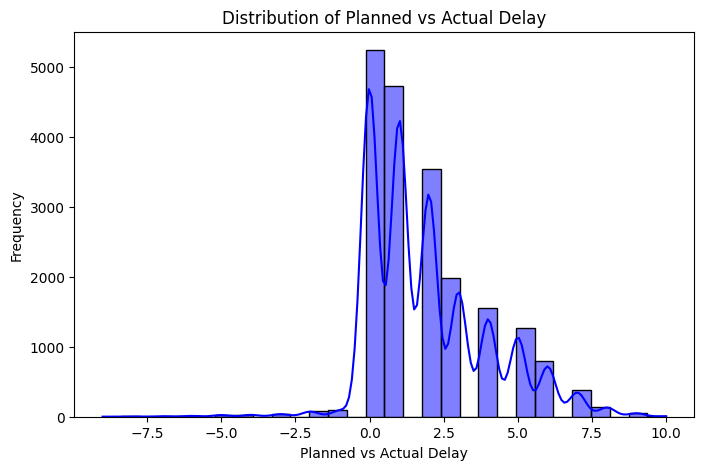

In [62]:
numerical_columns = ['Distance (km)', 'Delivery Duration', 'Planned vs Actual Delay']
for col in numerical_columns:
    plt.figure(figsize=(8, 5))
    sns.histplot(data[col], kde=True, bins=30, color='blue')
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()


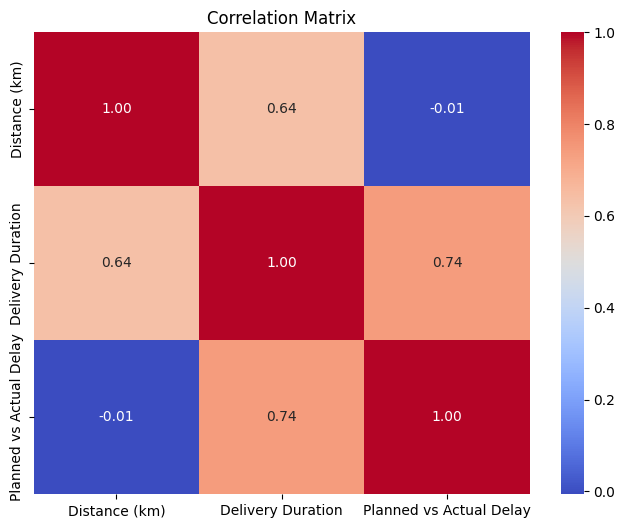

In [63]:
# Correlation matrix
correlation_matrix = data[['Distance (km)', 'Delivery Duration', 'Planned vs Actual Delay']].corr()

# Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix")
plt.show()


In [64]:
# Save the cleaned dataset to a new CSV file
data.to_csv("cleaned_ship.csv", index=False)
print("Cleaned dataset saved as cleaned_ship.csv.")


Cleaned dataset saved as cleaned_ship.csv.


In [65]:
# Import libraries for model development and evaluation
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


In [66]:
# Define features (X) and target (y)
X = data[['Distance (km)', 'Delivery Duration', 'Planned vs Actual Delay']]
y = data['Delayed'].map({'Yes': 1, 'No': 0})  # Map target to binary values (1 for Yes, 0 for No)

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Train-Test Split Completed:")
print(f"Training set: {X_train.shape}, Testing set: {X_test.shape}")


Train-Test Split Completed:
Training set: (16000, 3), Testing set: (4000, 3)


In [67]:
# Logistic Regression
log_reg = LogisticRegression()

# Train the model
log_reg.fit(X_train, y_train)

# Make predictions
y_pred_log = log_reg.predict(X_test)

# Evaluate the model
print("Logistic Regression Model Evaluation:")
accuracy_log_reg = print(f"Accuracy: {accuracy_score(y_test, y_pred_log):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_log):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_log):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred_log):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_log))


Logistic Regression Model Evaluation:
Accuracy: 0.9555
Precision: 0.9694
Recall: 0.9701
F1 Score: 0.9697

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.92      0.92      1059
           1       0.97      0.97      0.97      2941

    accuracy                           0.96      4000
   macro avg       0.94      0.94      0.94      4000
weighted avg       0.96      0.96      0.96      4000



In [68]:
# Decision Tree
decision_tree = DecisionTreeClassifier(random_state=42)

# Train the model
decision_tree.fit(X_train, y_train)

# Make predictions
y_pred_tree = decision_tree.predict(X_test)

# Evaluate the model
print("Decision Tree Model Evaluation:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_tree):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_tree):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_tree):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred_tree):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_tree))


Decision Tree Model Evaluation:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1059
           1       1.00      1.00      1.00      2941

    accuracy                           1.00      4000
   macro avg       1.00      1.00      1.00      4000
weighted avg       1.00      1.00      1.00      4000



In [69]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

# Generate synthetic dataset
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define the parameter grid for pre-pruning
param_grid = {
    'criterion': ["gini", "entropy"],  # Split criteria
    'max_depth': [2, 3, 4, 5],         # Limit tree depth
    'min_samples_leaf': [10, 20, 30], # Minimum samples per leaf
    'min_samples_split': [20, 30, 40] # Minimum samples to split
}

# Create a DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=42)

# Perform GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best parameters and model
best_params = grid_search.best_params_
print("Best Hyperparameters (Pre-Pruning):", best_params)

# Evaluate the best model on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Print classification report and accuracy
print("Accuracy (Pre-Pruning):", accuracy_score(y_test, y_pred))
print("\nClassification Report (Pre-Pruning):\n", classification_report(y_test, y_pred))


Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best Hyperparameters (Pre-Pruning): {'criterion': 'entropy', 'max_depth': 4, 'min_samples_leaf': 30, 'min_samples_split': 20}
Accuracy (Pre-Pruning): 0.87

Classification Report (Pre-Pruning):
               precision    recall  f1-score   support

           0       0.83      0.92      0.87       145
           1       0.92      0.82      0.87       155

    accuracy                           0.87       300
   macro avg       0.87      0.87      0.87       300
weighted avg       0.88      0.87      0.87       300



In [70]:
# Train an initial DecisionTreeClassifier
clf_full = DecisionTreeClassifier(random_state=42)
clf_full.fit(X_train, y_train)

# Get cost complexity pruning path
path = clf_full.cost_complexity_pruning_path(X_train, y_train)
alphas, impurities = path.ccp_alphas, path.impurities

print("Effective Alphas:", alphas)


Effective Alphas: [0.         0.0012987  0.00137566 0.00142202 0.0021645  0.00228571
 0.00263736 0.00265306 0.00273067 0.00274725 0.00277778 0.00340136
 0.00360144 0.00380952 0.00389916 0.00408163 0.0042517  0.00452119
 0.00589671 0.00609244 0.00806911 0.00817368 0.01880003 0.02182048
 0.30137567]


In [71]:
# Define parameter grid for pruning
param_grid_pruning = {'ccp_alpha': alphas}

# Perform GridSearchCV for pruning
grid_search_pruning = GridSearchCV(estimator=DecisionTreeClassifier(random_state=42),
                                   param_grid=param_grid_pruning, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
grid_search_pruning.fit(X_train, y_train)

# Best alpha for pruning
best_alpha = grid_search_pruning.best_params_['ccp_alpha']
print("Best Alpha (Post-Pruning):", best_alpha)


Fitting 5 folds for each of 25 candidates, totalling 125 fits
Best Alpha (Post-Pruning): 0.00806911417049088


In [72]:
# Train the pruned Decision Tree with best alpha
clf_pruned = DecisionTreeClassifier(random_state=42, ccp_alpha=best_alpha)
clf_pruned.fit(X_train, y_train)

# Evaluate the pruned tree
y_pred_pruned = clf_pruned.predict(X_test)

# Print classification report and accuracy
accuracy_pruned_tree = print("Accuracy (Post-Pruning):", accuracy_score(y_test, y_pred_pruned))
print("\nClassification Report (Post-Pruning):\n", classification_report(y_test, y_pred_pruned))


Accuracy (Post-Pruning): 0.8633333333333333

Classification Report (Post-Pruning):
               precision    recall  f1-score   support

           0       0.84      0.88      0.86       145
           1       0.89      0.85      0.86       155

    accuracy                           0.86       300
   macro avg       0.86      0.86      0.86       300
weighted avg       0.86      0.86      0.86       300



In [74]:
import joblib

# Save the trained model
joblib.dump(log_reg, 'logistic_regression_model.pkl')  # For Logistic Regression


['decision_tree_model.pkl']